This script attempts to determine the source of the 33.9psu, 6.3$^\circ C$ water that was found in the 2013 Falkor Cruise around MB07 and LB08.

Loading data takes roughly 43s.

In [1]:
import csv
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pylab
from sets import Set
import calendar
import seaborn as sns
import csvWOD
import copy

sns.set()

%matplotlib inline

cast_inf = csvWOD.csvWOD_readcasts("../../5_WOD13_Data/WOD13_002/ocldb1431635442.6176.CTD.csv")
cast_inf.extend(csvWOD.csvWOD_readcasts("../../5_WOD13_Data/WOD13_002/ocldb1431635442.6176.OSD.csv"))

In [2]:
def get_EW_info(cast_inf,EPS=0.05):
    lats = []
    lons = []
    yrs = Set([])

    EW_T0 = 6.3
    EW_T0_eps = EPS
    EW_S0 = 33.9
    EW_S0_eps = EPS
    
    ALL = {'lats' : [], 'lons' : [], 'yrs' : Set([]), 'dpths' : []}
    EW_T = {'lats' : [], 'lons' : [], 'dpths' : []}
    EW_S = {'lats' : [], 'lons' : [], 'dpths' : []}
    EW_TS = {'lats' : [], 'lons' : [], 'dpths' : []}
    
    for cast in cast_inf:
        if 'Temperatur' in cast['Variables'] and 'Salinity' in cast['Variables'] and 'Depth' in cast:
            for ii in range(0,len(cast['Depth'])):
                ALL['lats'].append(cast['Latitude'])
                ALL['lons'].append(cast['Longitude'])    
                ALL['yrs'].add(cast['Year'])
                ALL['dpths'].append(cast['Depth'][ii])
                if cast['Temperatur'][ii] > EW_T0-EW_T0_eps and cast['Temperatur'][ii] < EW_T0+EW_T0_eps:
                    EW_T['lats'].append(cast['Latitude'])
                    EW_T['lons'].append(cast['Longitude'])
                    EW_T['dpths'].append(cast['Depth'][ii])
                if cast['Salinity'][ii] > EW_S0-EW_S0_eps and cast['Salinity'][ii] < EW_S0+EW_S0_eps:
                    EW_S['lats'].append(cast['Latitude'])
                    EW_S['lons'].append(cast['Longitude'])
                    EW_S['dpths'].append(cast['Depth'][ii])
                if cast['Temperatur'][ii] > EW_T0-EW_T0_eps and cast['Temperatur'][ii] < EW_T0+EW_T0_eps and \
                   cast['Salinity'][ii] > EW_S0-EW_S0_eps and cast['Salinity'][ii] < EW_S0+EW_S0_eps:
                    EW_TS['lats'].append(cast['Latitude'])
                    EW_TS['lons'].append(cast['Longitude'])
                    EW_TS['dpths'].append(cast['Depth'][ii])
    return (ALL,EW_T,EW_S,EW_TS)

In [3]:
def plot_dat(title_str,all_filt):
    plt.figure(figsize=(12,12))

    sns.set_style("darkgrid")
    sns.set_context("poster")
    
    plt.plot(all_filt['ALL']['lons'],all_filt['ALL']['lats'],'.k',ms=5)
    plt.plot(all_filt['EW_T']['lons'],all_filt['EW_T']['lats'],'.r',ms=10,label='T matches eddy water')
    plt.plot(all_filt['EW_S']['lons'],all_filt['EW_S']['lats'],'.b',ms=10,label='S matches eddy water')
    plt.plot(all_filt['EW_TS']['lons'],all_filt['EW_TS']['lats'],'.g',ms=15,label='T&S matches eddy water')
    plt.ylim((40,55))
    plt.xlim((-135,-110))
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.legend()
    plt.title(title_str)
    plt.show()

    print "TOTAL CASTS AVAILABLE : ", str(len(all_filt['ALL']['lats']))
    print "YEARS AVAILABLE       : ", str(min(all_filt['ALL']['yrs'])), "---", str(max(all_filt['ALL']['yrs']))
    
    for ss in ['EW_TS']: #['EW_T','EW_S','EW_TS']:
        print "========================================"
        print ss
        print "========================================"
        print "  FRACTION ", ss, " MATCH  : ", str(float(len(all_filt[ss]['lats']))/float(len(all_filt['ALL']['lats'])))
        print "MEAN DEPTH ", ss, " MATCH  : ", str(np.mean(all_filt[ss]['dpths'])), 'm'
        print " MIN DEPTH ", ss, " MATCH  : ", str(np.min(all_filt[ss]['dpths'])), 'm'
        print " MAX DEPTH ", ss, " MATCH  : ", str(np.max(all_filt[ss]['dpths'])), 'm'
        print " STD DEPTH ", ss, " MATCH  : ", str(np.std(all_filt[ss]['dpths']))

Initial Investigation
============

Look at fractional matching of EW with all cast data from NOAA.

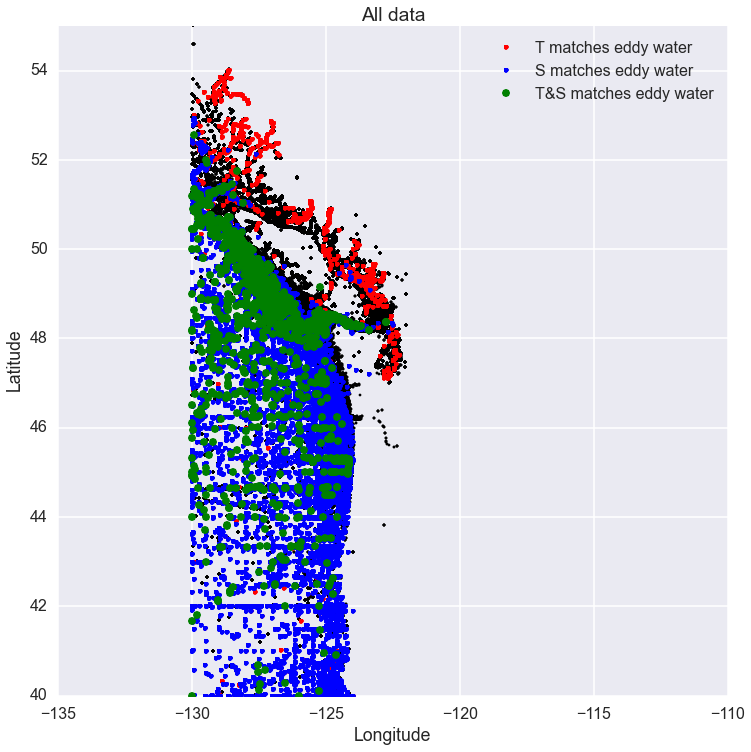

TOTAL CASTS AVAILABLE :  2963704
YEARS AVAILABLE       :  1911 --- 2014
EW_TS
  FRACTION  EW_TS  MATCH  :  0.000634003935616
MEAN DEPTH  EW_TS  MATCH  :  228.116019159 m
 MIN DEPTH  EW_TS  MATCH  :  50.0 m
 MAX DEPTH  EW_TS  MATCH  :  500.0 m
 STD DEPTH  EW_TS  MATCH  :  57.4005872127


In [4]:
# all months, all years
all_filt = {}
ALL,EW_T,EW_S,EW_TS = get_EW_info(cast_inf)
all_filt['ALL'] = copy.copy(ALL)
all_filt['EW_T'] = copy.copy(EW_T)
all_filt['EW_S'] = copy.copy(EW_S)
all_filt['EW_TS'] = copy.copy(EW_TS)

plot_dat('All data',all_filt)

In [5]:
# WE SEE THAT THE BASE FRACTION OF EW MATCHING IS 0.000634003935616, SET A VAR
base_frac_EW = 0.000634003935616

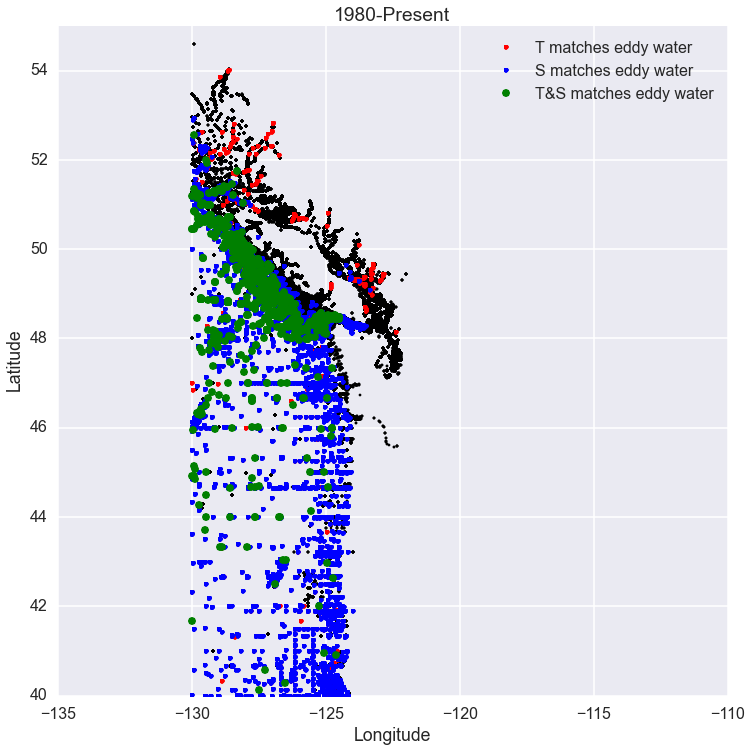

TOTAL CASTS AVAILABLE :  1624492
YEARS AVAILABLE       :  1980 --- 2014
EW_TS
  FRACTION  EW_TS  MATCH  :  0.000673441297341
MEAN DEPTH  EW_TS  MATCH  :  228.203839122 m
 MIN DEPTH  EW_TS  MATCH  :  60.0 m
 MAX DEPTH  EW_TS  MATCH  :  475.0 m
 STD DEPTH  EW_TS  MATCH  :  53.5281328745


In [6]:
# 1980-Present all months
yr_filt = {}
ALL,EW_T,EW_S,EW_TS = get_EW_info(csvWOD.csvWOD_filter_year(cast_inf,1980,2015))
yr_filt['ALL'] = copy.copy(ALL)
yr_filt['EW_T'] = copy.copy(EW_T)
yr_filt['EW_S'] = copy.copy(EW_S)
yr_filt['EW_TS'] = copy.copy(EW_TS)

plot_dat('1980-Present',yr_filt)

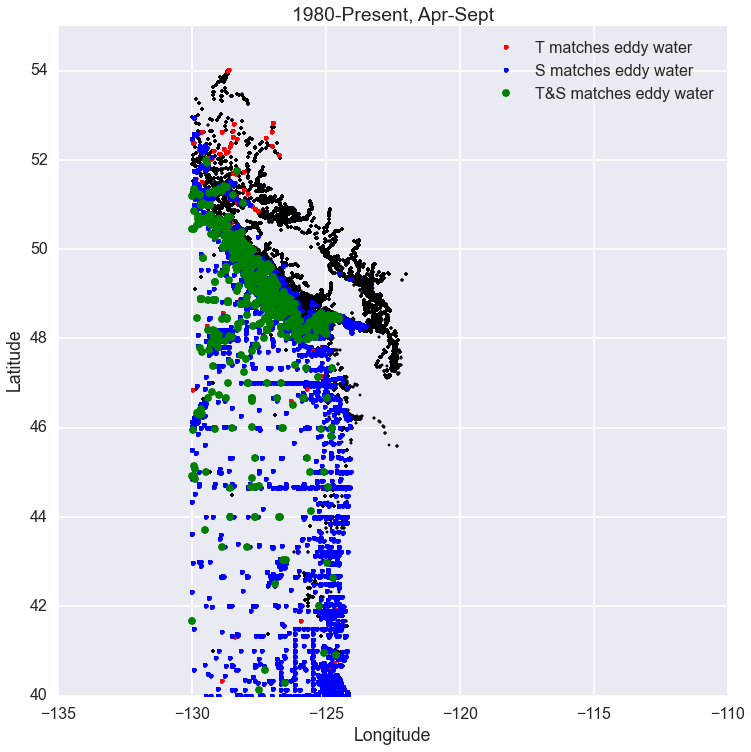

TOTAL CASTS AVAILABLE :  1061150
YEARS AVAILABLE       :  1980 --- 2014
EW_TS
  FRACTION  EW_TS  MATCH  :  0.00085473307261
MEAN DEPTH  EW_TS  MATCH  :  222.965821389 m
 MIN DEPTH  EW_TS  MATCH  :  60.0 m
 MAX DEPTH  EW_TS  MATCH  :  475.0 m
 STD DEPTH  EW_TS  MATCH  :  53.0837571262


In [7]:
# 1980-Present, April-September
yr_filt = {}
ALL,EW_T,EW_S,EW_TS = get_EW_info(csvWOD.csvWOD_filter_month(csvWOD.csvWOD_filter_year(cast_inf,1980,2015),4,9))
yr_filt['ALL'] = copy.copy(ALL)
yr_filt['EW_T'] = copy.copy(EW_T)
yr_filt['EW_S'] = copy.copy(EW_S)
yr_filt['EW_TS'] = copy.copy(EW_TS)

plot_dat('1980-Present, Apr-Sept',yr_filt)

WCVI and WCUS
===========

Okay, these plots were generated for the whole dataset. Let's subdivide by region to try and identify which water mass is the source. From this data, we'll subdivide everything into west coast US water (WCUS), and west coast Vancouver Island water (WCVI).

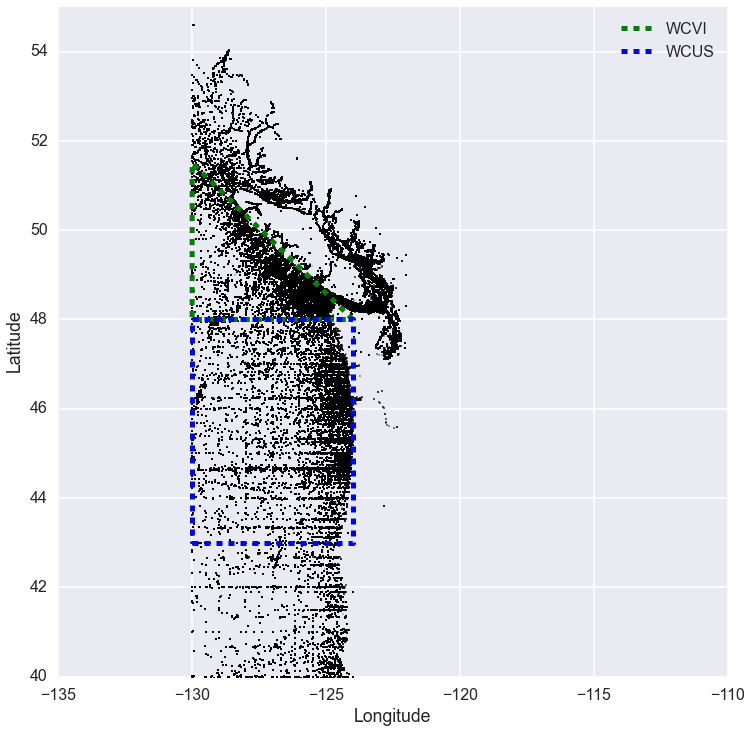

In [8]:
plt.figure(figsize=(12,12))

sns.set_style("darkgrid")
sns.set_context("poster")

WCVI_lnmin = -130
WCVI_lnmax = -124
WCVI_ltmin =  48
WCVI_ltmax =  51.5

WCUS_lnmin = -130
WCUS_lnmax = -124
WCUS_ltmin =  43
WCUS_ltmax =  48

plt.plot(all_filt['ALL']['lons'],all_filt['ALL']['lats'],'.k',ms=2)
plt.plot([WCVI_lnmax,WCVI_lnmin,WCVI_lnmin,WCVI_lnmax],[WCVI_ltmin,WCVI_ltmax,WCVI_ltmin,WCVI_ltmin],'--g',label='WCVI',lw=5)
plt.plot([WCUS_lnmin,WCUS_lnmax,WCUS_lnmax,WCUS_lnmin,WCUS_lnmin],[WCUS_ltmin,WCUS_ltmin,WCUS_ltmax,WCUS_ltmax,WCUS_ltmin],'--b',label='WCUS',lw=5)
plt.ylim((40,55))
plt.xlim((-135,-110))
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()

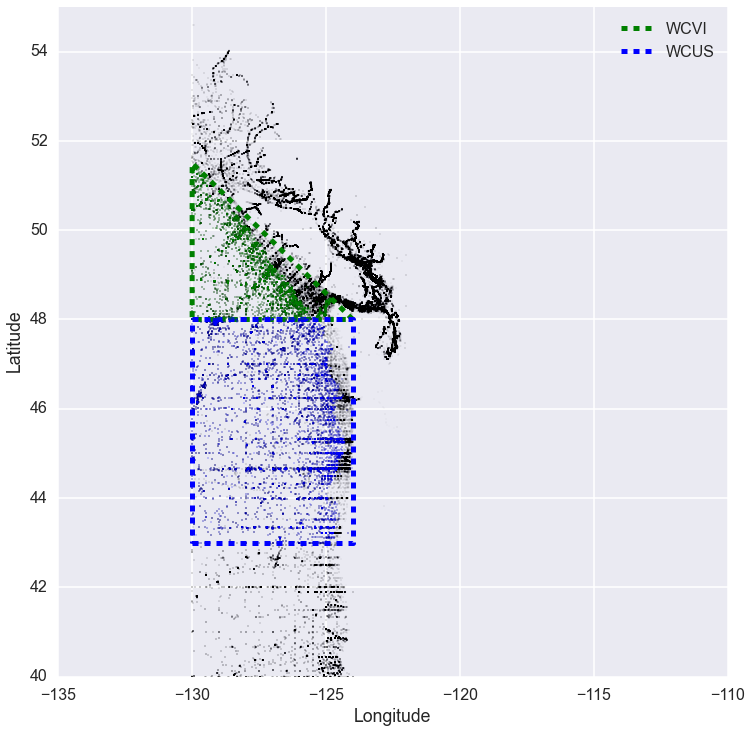

In [9]:
WCVI_cinf = []
WCUS_cinf = []

WCVI_lats = []
WCVI_lons = []

WCUS_lats = []
WCUS_lons = []

WCVI_slope = float(WCVI_ltmin-WCVI_ltmax)/float(WCVI_lnmax-WCVI_lnmin)
WCVI_int   = WCVI_ltmax - WCVI_slope*WCVI_lnmin #y - mx

for cast in cast_inf:
    lt = cast['Latitude']
    ln = cast['Longitude']
    
    # only keep casts with depth info
    if 'Depth' not in cast:
        continue
        
    # only keep deep casts that include points in the range of interest
    if max(cast['Depth']) < 200 or min(cast['Depth']) > 250:
        continue
    
    # WCUS
    if ln >= WCUS_lnmin and ln <= WCUS_lnmax and lt >= WCUS_ltmin and lt <= WCUS_ltmax:
        WCUS_lats.append(lt)
        WCUS_lons.append(ln)
        WCUS_cinf.append(cast)
    
    # WCVI
    if ln >= WCVI_lnmin and  ln <= WCVI_lnmax and \
       lt >= WCVI_ltmin and lt <= WCVI_slope*ln + WCVI_int:
        WCVI_lats.append(lt)
        WCVI_lons.append(ln)
        WCVI_cinf.append(cast)

plt.figure(figsize=(12,12))

sns.set_style("darkgrid")
sns.set_context("poster")

plt.plot(all_filt['ALL']['lons'],all_filt['ALL']['lats'],'.k',ms=1,alpha=0.1)
plt.plot([WCVI_lnmax,WCVI_lnmin,WCVI_lnmin,WCVI_lnmax],[WCVI_ltmin,WCVI_ltmax,WCVI_ltmin,WCVI_ltmin],'--g',label='WCVI',lw=5)
plt.plot([WCUS_lnmin,WCUS_lnmax,WCUS_lnmax,WCUS_lnmin,WCUS_lnmin],[WCUS_ltmin,WCUS_ltmin,WCUS_ltmax,WCUS_ltmax,WCUS_ltmin],'--b',label='WCUS',lw=5)
plt.plot(WCVI_lons,WCVI_lats,'.g',ms=2)
plt.plot(WCUS_lons,WCUS_lats,'.b',ms=2)
plt.ylim((40,55))
plt.xlim((-135,-110))
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()

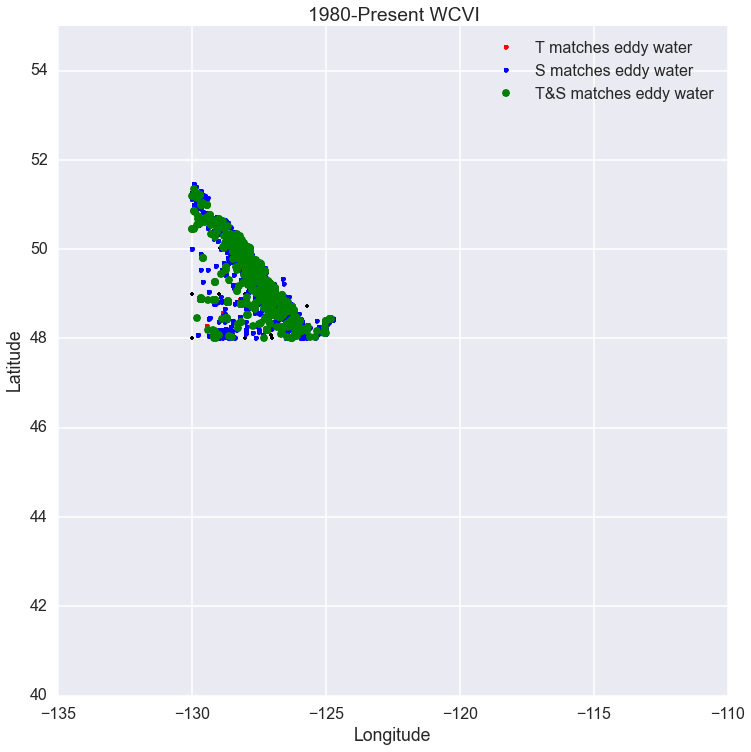

TOTAL CASTS AVAILABLE :  238696
YEARS AVAILABLE       :  1980 --- 2009
EW_TS
  FRACTION  EW_TS  MATCH  :  0.00330545966418
MEAN DEPTH  EW_TS  MATCH  :  233.225602028 m
 MIN DEPTH  EW_TS  MATCH  :  85.0 m
 MAX DEPTH  EW_TS  MATCH  :  425.0 m
 STD DEPTH  EW_TS  MATCH  :  38.4278469418


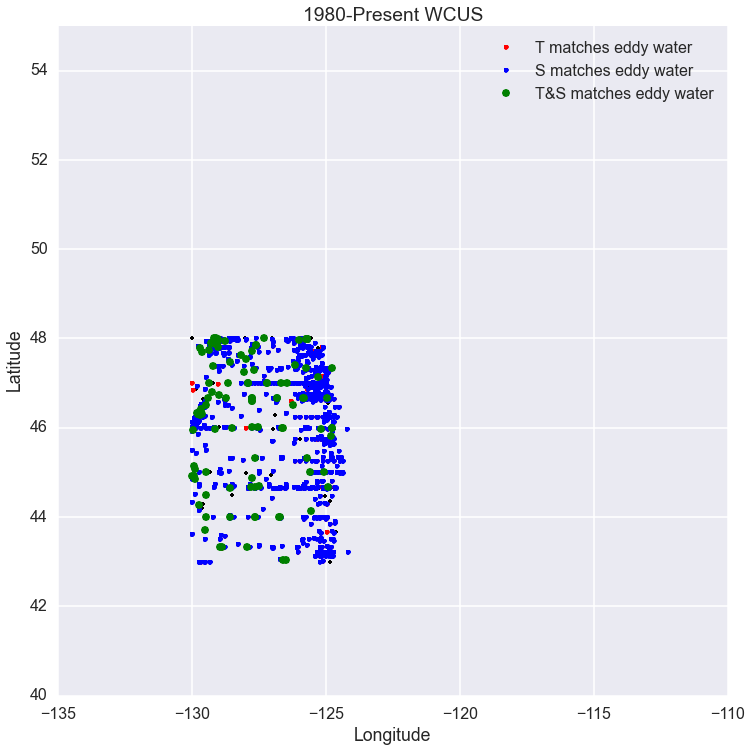

TOTAL CASTS AVAILABLE :  86258
YEARS AVAILABLE       :  1980 --- 2008
EW_TS
  FRACTION  EW_TS  MATCH  :  0.00161144473556
MEAN DEPTH  EW_TS  MATCH  :  257.553956835 m
 MIN DEPTH  EW_TS  MATCH  :  200.0 m
 MAX DEPTH  EW_TS  MATCH  :  475.0 m
 STD DEPTH  EW_TS  MATCH  :  31.969898761


In [10]:
# 1980-Present all months :: WCVI
WCVI_filt = {}
ALL,EW_T,EW_S,EW_TS = get_EW_info(csvWOD.csvWOD_filter_year(WCVI_cinf,1980,2015))
WCVI_filt['ALL'] = copy.copy(ALL)
WCVI_filt['EW_T'] = copy.copy(EW_T)
WCVI_filt['EW_S'] = copy.copy(EW_S)
WCVI_filt['EW_TS'] = copy.copy(EW_TS)

plot_dat('1980-Present WCVI',WCVI_filt)

# 1980-Present all months :: WCUS
WCUS_filt = {}
ALL,EW_T,EW_S,EW_TS = get_EW_info(csvWOD.csvWOD_filter_year(WCUS_cinf,1980,2015))
WCUS_filt['ALL'] = copy.copy(ALL)
WCUS_filt['EW_T'] = copy.copy(EW_T)
WCUS_filt['EW_S'] = copy.copy(EW_S)
WCUS_filt['EW_TS'] = copy.copy(EW_TS)

plot_dat('1980-Present WCUS',WCUS_filt)

It seems that splitting into two regions shows that it's 3.3ppt of ALL CAST DATA off WCVI that fit the T/S of eddy water, and 1.6ppt of casts off WCUS that fit the T/S of eddy water.

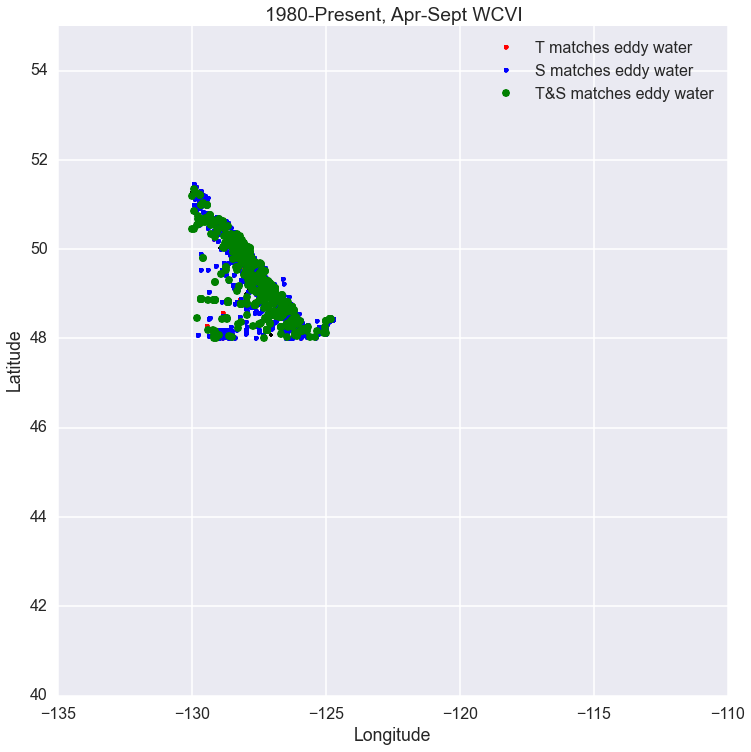

TOTAL CASTS AVAILABLE :  172230
YEARS AVAILABLE       :  1980 --- 2009
EW_TS
  FRACTION  EW_TS  MATCH  :  0.00364628694188
MEAN DEPTH  EW_TS  MATCH  :  229.840764331 m
 MIN DEPTH  EW_TS  MATCH  :  85.0 m
 MAX DEPTH  EW_TS  MATCH  :  425.0 m
 STD DEPTH  EW_TS  MATCH  :  38.0408780388


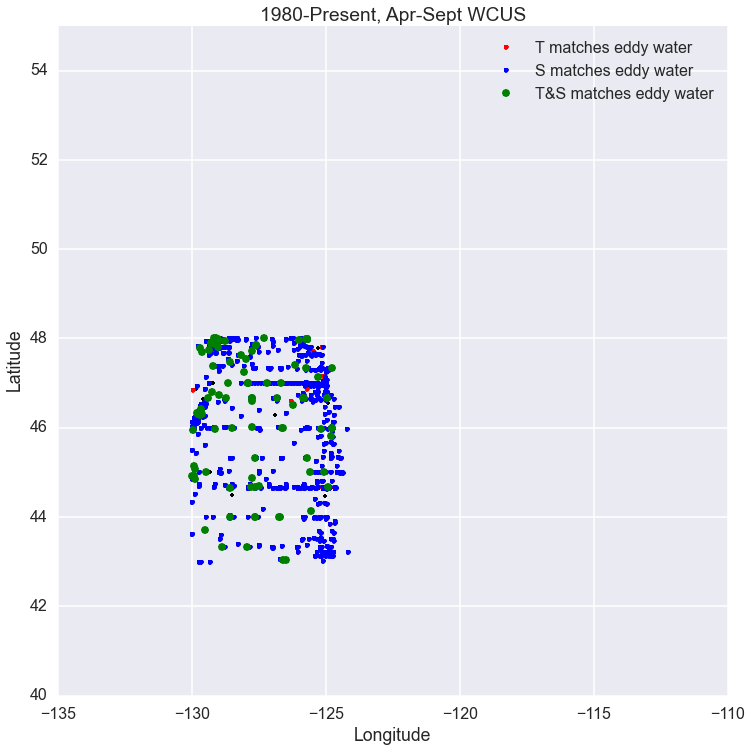

TOTAL CASTS AVAILABLE :  67848
YEARS AVAILABLE       :  1980 --- 2008
EW_TS
  FRACTION  EW_TS  MATCH  :  0.00184235349605
MEAN DEPTH  EW_TS  MATCH  :  256.0 m
 MIN DEPTH  EW_TS  MATCH  :  200.0 m
 MAX DEPTH  EW_TS  MATCH  :  475.0 m
 STD DEPTH  EW_TS  MATCH  :  32.0


In [11]:
# 1980-Present Apr-Sept :: WCVI
WCVI_filt = {}
ALL,EW_T,EW_S,EW_TS = get_EW_info(csvWOD.csvWOD_filter_month(csvWOD.csvWOD_filter_year(WCVI_cinf,1980,2015),4,9))
WCVI_filt['ALL'] = copy.copy(ALL)
WCVI_filt['EW_T'] = copy.copy(EW_T)
WCVI_filt['EW_S'] = copy.copy(EW_S)
WCVI_filt['EW_TS'] = copy.copy(EW_TS)

plot_dat('1980-Present, Apr-Sept WCVI',WCVI_filt)

# 1980-Present Apr-Sept :: WCUS
WCUS_filt = {}
ALL,EW_T,EW_S,EW_TS = get_EW_info(csvWOD.csvWOD_filter_month(csvWOD.csvWOD_filter_year(WCUS_cinf,1980,2015),4,9))
WCUS_filt['ALL'] = copy.copy(ALL)
WCUS_filt['EW_T'] = copy.copy(EW_T)
WCUS_filt['EW_S'] = copy.copy(EW_S)
WCUS_filt['EW_TS'] = copy.copy(EW_TS)

plot_dat('1980-Present, Apr-Sept WCUS',WCUS_filt)

Once again, the difference between percentage of casts that see eddy-valued water is small between WCVI and WCUS (3.6ppt to 1.8ppt). This may be significant, but it goes to show that the initial plots may be misleading (where it seemed as though the vast majority of matches came from WCVI).

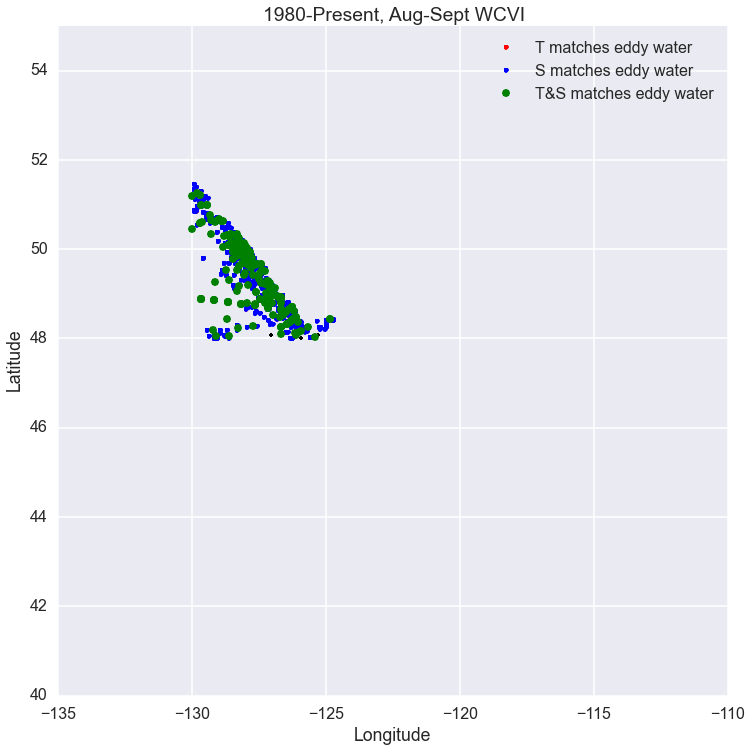

TOTAL CASTS AVAILABLE :  56074
YEARS AVAILABLE       :  1980 --- 2009
EW_TS
  FRACTION  EW_TS  MATCH  :  0.00358454898884
MEAN DEPTH  EW_TS  MATCH  :  234.2039801 m
 MIN DEPTH  EW_TS  MATCH  :  125.0 m
 MAX DEPTH  EW_TS  MATCH  :  400.0 m
 STD DEPTH  EW_TS  MATCH  :  35.7383134582


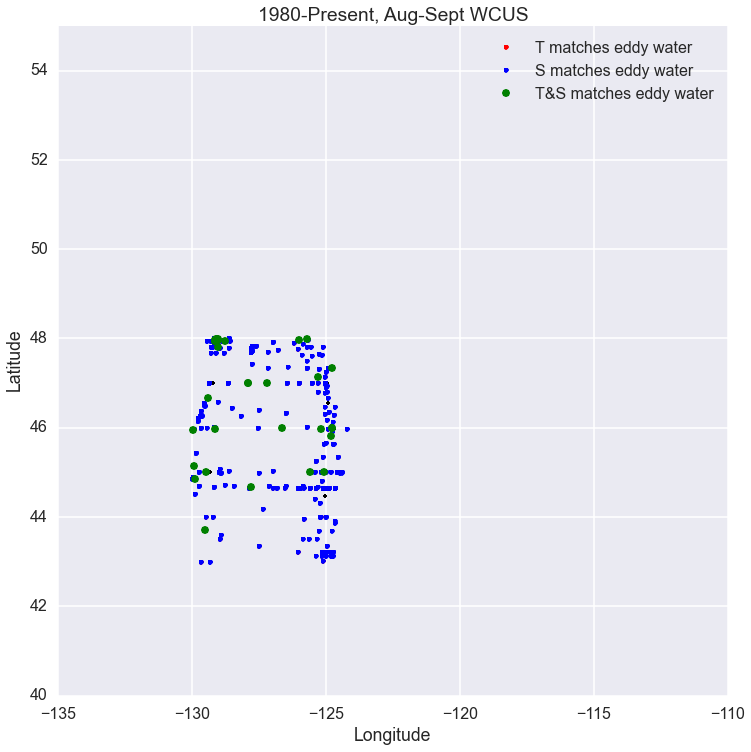

TOTAL CASTS AVAILABLE :  20693
YEARS AVAILABLE       :  1980 --- 2008
EW_TS
  FRACTION  EW_TS  MATCH  :  0.00178804426618
MEAN DEPTH  EW_TS  MATCH  :  272.297297297 m
 MIN DEPTH  EW_TS  MATCH  :  225.0 m
 MAX DEPTH  EW_TS  MATCH  :  475.0 m
 STD DEPTH  EW_TS  MATCH  :  39.7559207658


In [12]:
# 1980-Present Aug-Sept :: WCVI
WCVI_filt = {}
ALL,EW_T,EW_S,EW_TS = get_EW_info(csvWOD.csvWOD_filter_month(csvWOD.csvWOD_filter_year(WCVI_cinf,1980,2015),8,9))
WCVI_filt['ALL'] = copy.copy(ALL)
WCVI_filt['EW_T'] = copy.copy(EW_T)
WCVI_filt['EW_S'] = copy.copy(EW_S)
WCVI_filt['EW_TS'] = copy.copy(EW_TS)

plot_dat('1980-Present, Aug-Sept WCVI',WCVI_filt)

# 1980-Present Aug-Sept :: WCUS
WCUS_filt = {}
ALL,EW_T,EW_S,EW_TS = get_EW_info(csvWOD.csvWOD_filter_month(csvWOD.csvWOD_filter_year(WCUS_cinf,1980,2015),8,9))
WCUS_filt['ALL'] = copy.copy(ALL)
WCUS_filt['EW_T'] = copy.copy(EW_T)
WCUS_filt['EW_S'] = copy.copy(EW_S)
WCUS_filt['EW_TS'] = copy.copy(EW_TS)

plot_dat('1980-Present, Aug-Sept WCUS',WCUS_filt)

Narrowing the requirements even further shows the same pattern. This water mass appears to be consistent across the west coast from 43 deg N to 51.5 deg N (however, it appears to become more prominent with latitude).

What if we run it with a tight fit -- epsilon of 0.02 instead of 0.05?

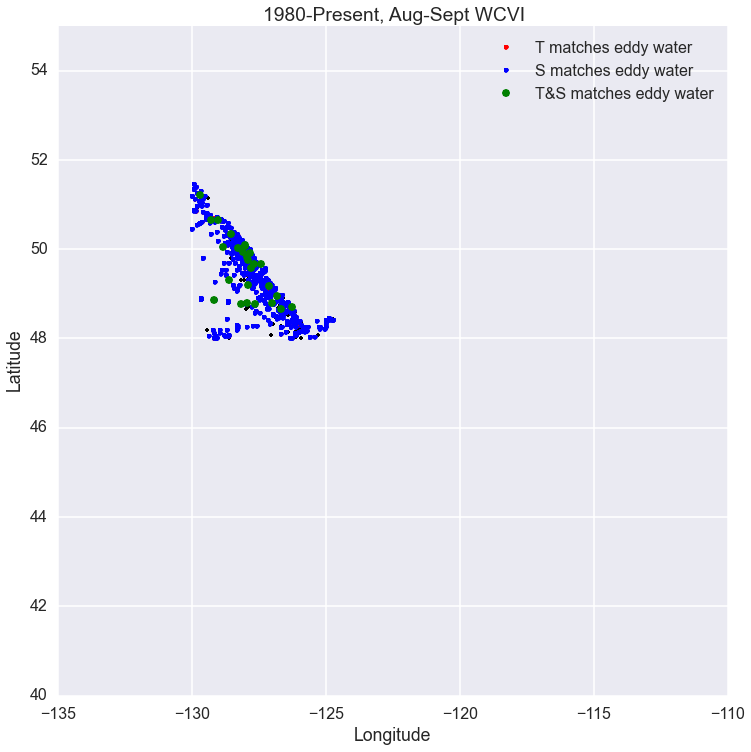

TOTAL CASTS AVAILABLE :  56074
YEARS AVAILABLE       :  1980 --- 2009
EW_TS
  FRACTION  EW_TS  MATCH  :  0.000463673003531
MEAN DEPTH  EW_TS  MATCH  :  229.807692308 m
 MIN DEPTH  EW_TS  MATCH  :  150.0 m
 MAX DEPTH  EW_TS  MATCH  :  400.0 m
 STD DEPTH  EW_TS  MATCH  :  44.9461380482


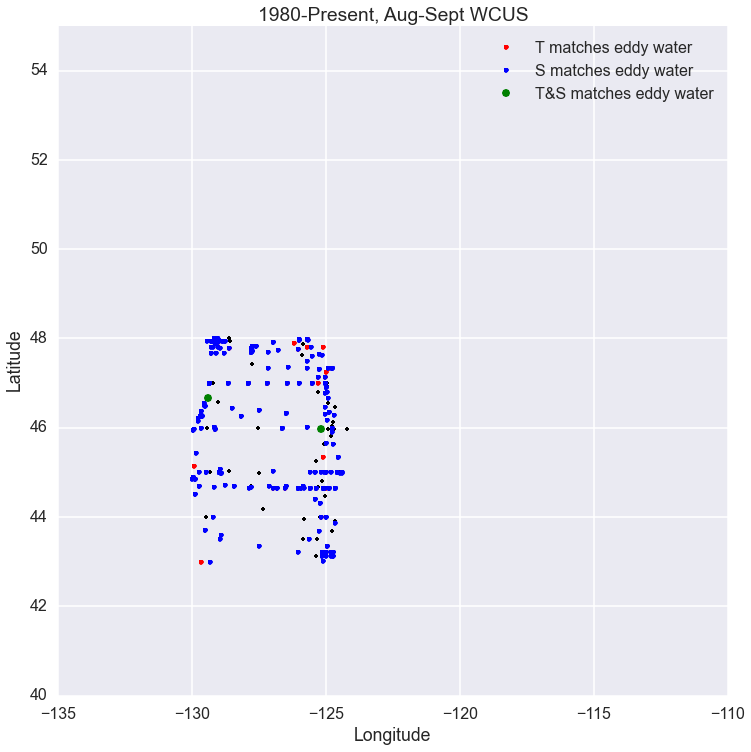

TOTAL CASTS AVAILABLE :  20693
YEARS AVAILABLE       :  1980 --- 2008
EW_TS
  FRACTION  EW_TS  MATCH  :  9.6651041415e-05
MEAN DEPTH  EW_TS  MATCH  :  262.5 m
 MIN DEPTH  EW_TS  MATCH  :  250.0 m
 MAX DEPTH  EW_TS  MATCH  :  275.0 m
 STD DEPTH  EW_TS  MATCH  :  12.5


In [13]:
# 1980-Present Aug-Sept :: WCVI
WCVI_filt = {}
ALL,EW_T,EW_S,EW_TS = get_EW_info(csvWOD.csvWOD_filter_month(csvWOD.csvWOD_filter_year(WCVI_cinf,1980,2015),8,9),EPS=0.02)
WCVI_filt['ALL'] = copy.copy(ALL)
WCVI_filt['EW_T'] = copy.copy(EW_T)
WCVI_filt['EW_S'] = copy.copy(EW_S)
WCVI_filt['EW_TS'] = copy.copy(EW_TS)

plot_dat('1980-Present, Aug-Sept WCVI',WCVI_filt)

# 1980-Present Aug-Sept :: WCUS
WCUS_filt = {}
ALL,EW_T,EW_S,EW_TS = get_EW_info(csvWOD.csvWOD_filter_month(csvWOD.csvWOD_filter_year(WCUS_cinf,1980,2015),8,9),EPS=0.02)
WCUS_filt['ALL'] = copy.copy(ALL)
WCUS_filt['EW_T'] = copy.copy(EW_T)
WCUS_filt['EW_S'] = copy.copy(EW_S)
WCUS_filt['EW_TS'] = copy.copy(EW_TS)

plot_dat('1980-Present, Aug-Sept WCUS',WCUS_filt)

So it seems that to the south, the mean depth is just below the core of the CUC. To the north the depth is ~230m.

What is the annual cycle of EW in these two regions? Looking at data from 1970-present now (fuller dataset, trends more robust than for 1980-present).

In [14]:
mnthWCVI_filt = [[] for k in range(1,13)]
mnthWCUS_filt = [[] for k in range(1,13)]

# look at monthly values/percentages/stats for each month
for ii in range(1,13):
    ALL,EW_T,EW_S,EW_TS = get_EW_info(csvWOD.csvWOD_filter_month(csvWOD.csvWOD_filter_year(WCVI_cinf,1970,2015),ii),EPS=0.05)
    mnthWCVI_filt[ii-1] = copy.copy(EW_TS)
    mnthWCVI_filt[ii-1]['count'] = len(ALL['lats'])
    mnthWCVI_filt[ii-1]['match_perc'] = float(len(EW_TS['lats']))/float(len(ALL['lats']))

    # 1980-Present Aug-Sept :: WCUS
    ALL,EW_T,EW_S,EW_TS = get_EW_info(csvWOD.csvWOD_filter_month(csvWOD.csvWOD_filter_year(WCUS_cinf,1970,2015),ii),EPS=0.05)
    mnthWCUS_filt[ii-1] = copy.copy(EW_TS)
    mnthWCUS_filt[ii-1]['count'] = len(ALL['lats'])
    mnthWCUS_filt[ii-1]['match_perc'] = float(len(EW_TS['lats']))/float(len(ALL['lats']))

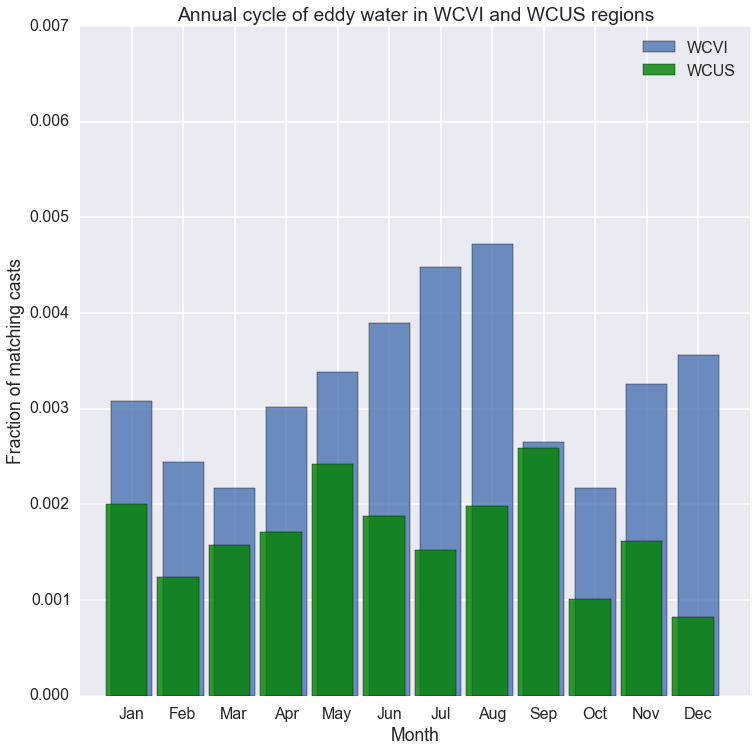

In [15]:
plt.figure(figsize=(12,12))

plt.bar(np.arange(1,13)-0.4, [k['match_perc'] for k in mnthWCVI_filt], label='WCVI',alpha=0.8)
plt.bar(np.arange(1,13)-0.5, [k['match_perc'] for k in mnthWCUS_filt], label='WCUS',color='g',alpha=0.8)

plt.xlim((0,13))
plt.ylim((0,.007))

plt.xticks(np.arange(1,13),['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.legend()

plt.xlabel('Month')
plt.ylabel('Fraction of matching casts')
plt.title('Annual cycle of eddy water in WCVI and WCUS regions')
plt.show()

Looking at the previous plot:
- WCVI shows a trend of increasing prevelance in EW for the summer and winter months. May-Aug peak, Nov-Feb peak, with Mar-Apr and Sep-Oct being transition periods
- WCUS does not show the same pattern, with only the summer months being stronger in percentage of EW
- September shows a spike in fractional matching for WCUS and is the only month where fraction of EW in WCUS and WCVI regions are closest

What does this mean for the dynamics? Where does the EW come from? What can this specific plot say about the annual cycle?

We know that the eddy begins spinning up around March, and that the upwelling season exists until roughly October. This corresponds with the regions of increased EW in WCUS region (Apr-Sep inclusive). The prevalence of EW around WCVI in the winter months is peculiar, but no conclusions can be made about it right now.

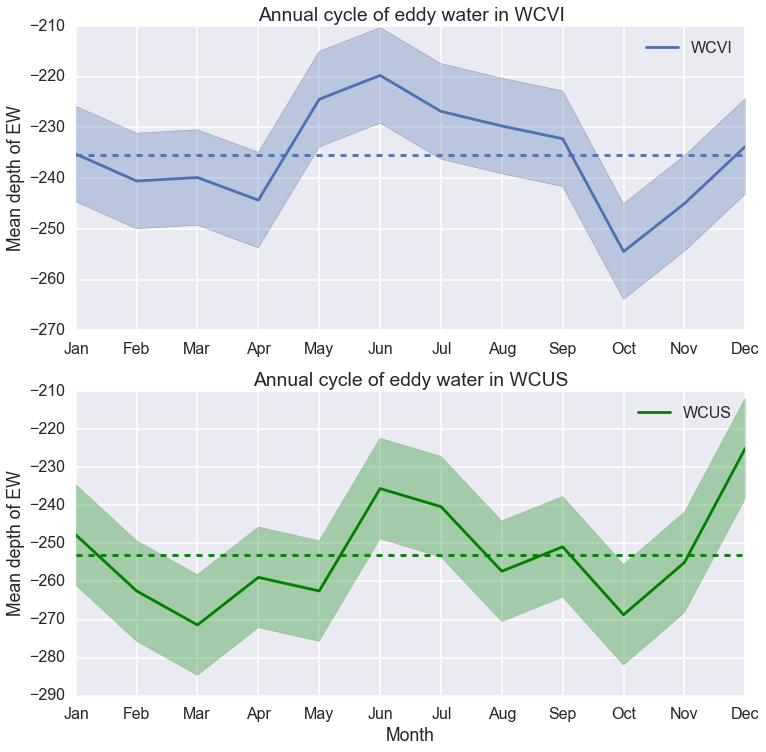

In [16]:
plt.figure(figsize=(12,12))

meanWCVI = np.nanmean([-np.mean(k['dpths']) for k in mnthWCVI_filt])
meanWCUS = np.nanmean([-np.mean(k['dpths']) for k in mnthWCUS_filt])
stdWCVI = np.nanstd([-np.mean(k['dpths']) for k in mnthWCVI_filt])
stdWCUS = np.nanstd([-np.mean(k['dpths']) for k in mnthWCUS_filt])

plt.subplot(2,1,1)
plt.plot(np.arange(1,13), [-np.mean(k['dpths']) for k in mnthWCVI_filt], label='WCVI')
plt.gca().set_color_cycle(None)
plt.fill_between(np.arange(1,13),[-np.mean(k['dpths']) for k in mnthWCVI_filt]-stdWCVI,[-np.mean(k['dpths']) for k in mnthWCVI_filt]+stdWCVI,alpha=0.3)
plt.gca().set_color_cycle(None)
plt.plot(np.arange(1,13), [meanWCVI for k in range(1,13)],'--')
plt.xlim((1,12))
plt.xticks(np.arange(1,13),['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.legend()

plt.ylabel('Mean depth of EW')
plt.title('Annual cycle of eddy water in WCVI')

plt.subplot(2,1,2)
plt.plot(np.arange(1,13), [-np.mean(k['dpths']) for k in mnthWCUS_filt], label='WCUS',color='g')
plt.fill_between(np.arange(1,13),[-np.mean(k['dpths']) for k in mnthWCUS_filt]-stdWCUS,[-np.mean(k['dpths']) for k in mnthWCUS_filt]+stdWCUS,color='g',alpha=0.3)
plt.plot(np.arange(1,13), [meanWCUS for k in range(1,13)],'--g')

plt.xlim((1,12))
plt.xticks(np.arange(1,13),['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.legend()

plt.xlabel('Month')
plt.ylabel('Mean depth of EW')
plt.title('Annual cycle of eddy water in WCUS')
plt.show()

Looking at the mean depths of EW in the two regions, it's apparent that there is an annual cycle -- the EW is shallowest during the summer and winter, and deepest during transitional months. The sharp spike in Dec for WCUS water is to be taken with some skepticism -- all of the Dec data is taken between 1970-1980 and has the fewest number of casts available. If data from 1980-present was used instead, there is actually no fractional matching of EW in Dec for WCUS.

WCVI, WCUS and Eddy Region (ER)
===================

Let's add in the eddy region to the previous analysis

Note MB07 coords: (from HowMuchOfEach.ipynb)

48  28.20000 N  (deg min)
125  19.49000 W  (deg min)

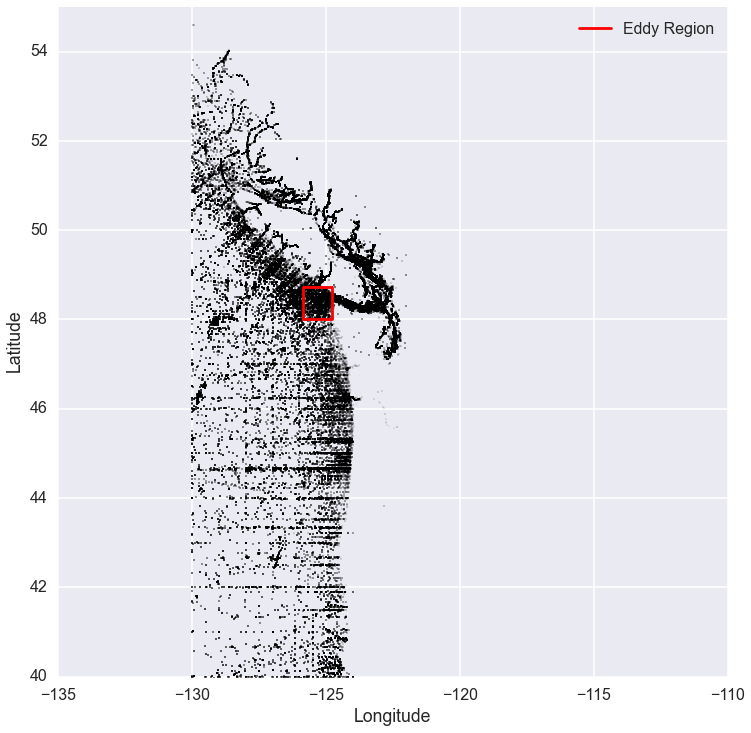

In [17]:
plt.figure(figsize=(12,12))

sns.set_style("darkgrid")
sns.set_context("poster")

# move the centre down just a touch so region doesn't intersect with VI too much
MB07 = [-(125 + 19.49/60.0),48+28.2/60.0-0.1] 

ERdelx = 0.55
ERdely = 0.35
ER_x = [MB07[0]-ERdelx,MB07[0]+ERdelx,MB07[0]+ERdelx,MB07[0]-ERdelx,MB07[0]-ERdelx]
ER_y = [MB07[1]-ERdely,MB07[1]-ERdely,MB07[1]+ERdely,MB07[1]+ERdely,MB07[1]-ERdely]

plt.plot(all_filt['ALL']['lons'],all_filt['ALL']['lats'],'.k',ms=2,alpha=0.1)
plt.plot(ER_x,ER_y,'-r',label='Eddy Region')
plt.ylim((40,55))
plt.xlim((-135,-110))
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()

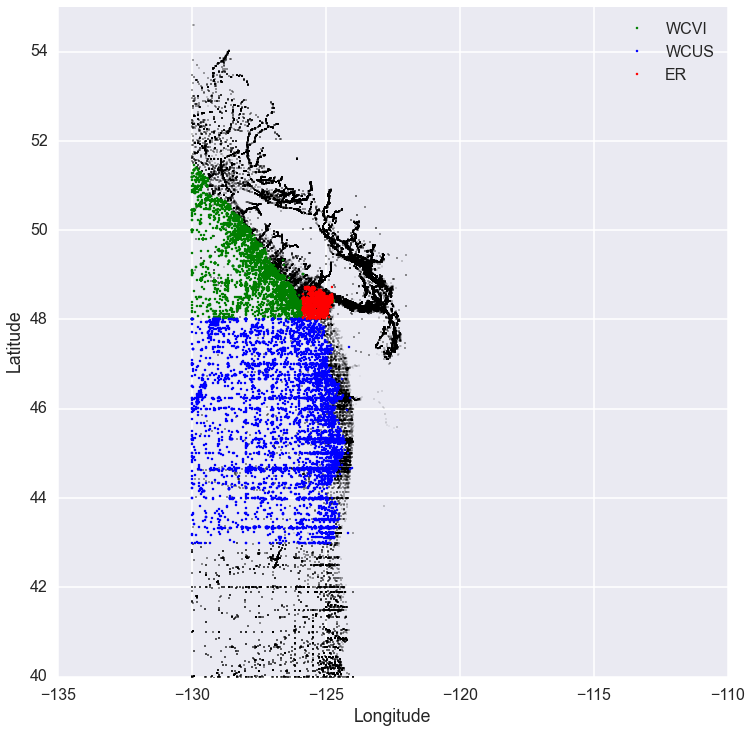

In [18]:
ER_cinf = []

for cast in cast_inf:
    lt = cast['Latitude']
    ln = cast['Longitude']
    
    # only keep casts with depth info
    if 'Depth' not in cast:
        continue
        
    # only keep deep casts that include points in the range of interest
    if max(cast['Depth']) < 100 or min(cast['Depth']) > 250:
        continue
    
    # ER
    if ln >= min(ER_x) and ln <= max(ER_x) and lt >= min(ER_y) and lt <= max(ER_y):
        ER_cinf.append(cast)
        
ER_lon = [k['Longitude'] for k in ER_cinf]
ER_lat = [k['Latitude'] for k in ER_cinf]

plt.figure(figsize=(12,12))

sns.set_style("darkgrid")
sns.set_context("poster")

plt.plot(all_filt['ALL']['lons'],all_filt['ALL']['lats'],'.k',ms=2,alpha=0.1)
plt.plot(WCVI_lons,WCVI_lats,'.g',ms=5,label='WCVI')
plt.plot(WCUS_lons,WCUS_lats,'.b',ms=5,label='WCUS')
#plt.plot(ER_x,ER_y,'-r')
plt.plot(ER_lon,ER_lat,'.r',ms=5,label='ER')
plt.ylim((40,55))
plt.xlim((-135,-110))
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()

In [19]:
mnthER_filt = [[] for k in range(1,13)]
mnthWCVI_filt = [[] for k in range(1,13)]
mnthWCUS_filt = [[] for k in range(1,13)]

MIN_YEAR = 1970
MAX_YEAR = 2015

# look at monthly values/percentages/stats for each month
for ii in range(1,13):
    ALL,EW_T,EW_S,EW_TS = get_EW_info(csvWOD.csvWOD_filter_month(csvWOD.csvWOD_filter_year(ER_cinf,MIN_YEAR,MAX_YEAR),ii),EPS=0.05)
    mnthER_filt[ii-1] = copy.copy(EW_TS)
    mnthER_filt[ii-1]['count'] = len(ALL['lats'])
    mnthER_filt[ii-1]['match_perc'] = float(len(EW_TS['lats']))/float(len(ALL['lats']))
    
    ALL,EW_T,EW_S,EW_TS = get_EW_info(csvWOD.csvWOD_filter_month(csvWOD.csvWOD_filter_year(WCVI_cinf,MIN_YEAR,MAX_YEAR),ii),EPS=0.05)
    mnthWCVI_filt[ii-1] = copy.copy(EW_TS)
    mnthWCVI_filt[ii-1]['count'] = len(ALL['lats'])
    mnthWCVI_filt[ii-1]['match_perc'] = float(len(EW_TS['lats']))/float(len(ALL['lats']))

    ALL,EW_T,EW_S,EW_TS = get_EW_info(csvWOD.csvWOD_filter_month(csvWOD.csvWOD_filter_year(WCUS_cinf,MIN_YEAR,MAX_YEAR),ii),EPS=0.05)
    mnthWCUS_filt[ii-1] = copy.copy(EW_TS)
    mnthWCUS_filt[ii-1]['count'] = len(ALL['lats'])
    mnthWCUS_filt[ii-1]['match_perc'] = float(len(EW_TS['lats']))/float(len(ALL['lats']))

The following plot looks at fractional casts that contain EW values of Salinity and temperature. Data is taken from 1970-present so that instrumentation is consistent and the dataset is still large.

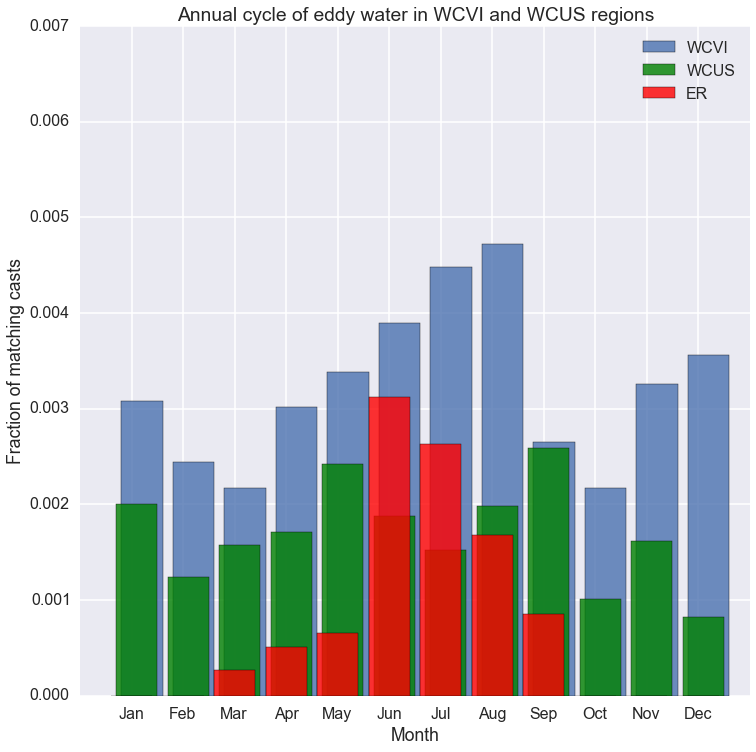

Correlation coefficients for mean EW freq
Corr(WCUS,WCVI)[Jan-Dec] :  0.165385919632
Corr(ER,  WCVI)[Mar-Sep] :  0.744710899767
Corr(ER,  WCUS)[Mar-Sep] :  -0.257836817681


In [20]:
plt.figure(figsize=(12,12))

plt.bar(np.arange(1,13)-0.2, [k['match_perc'] for k in mnthWCVI_filt], label='WCVI',alpha=0.8)
plt.bar(np.arange(1,13)-0.3, [k['match_perc'] for k in mnthWCUS_filt], label='WCUS',color='g',alpha=0.8)
plt.bar(np.arange(1,13)-0.4, [k['match_perc'] for k in mnthER_filt], label='ER',alpha=0.8,color='r')

plt.xlim((0,13))
plt.ylim((0,.007))

plt.xticks(np.arange(1,13),['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.legend()

plt.xlabel('Month')
plt.ylabel('Fraction of matching casts')
plt.title('Annual cycle of eddy water in WCVI and WCUS regions')
plt.show()


## ALSO LOOK AT THE CORRELATION BETWEEN CURVES
WCVI_freq = [k['match_perc'] for k in mnthWCVI_filt] 
WCUS_freq = [k['match_perc'] for k in mnthWCUS_filt]
ER_freq = [k['match_perc'] for k in mnthER_filt]

print "Correlation coefficients for mean EW freq"
print "==========================================="
print "Corr(WCUS,WCVI)[Jan-Dec] : ", np.corrcoef(WCUS_freq,WCVI_freq)[1,0]
print "Corr(ER,  WCVI)[Mar-Sep] : ", np.corrcoef(ER_freq[2:9],WCVI_freq[2:9])[1,0]
print "Corr(ER,  WCUS)[Mar-Sep] : ", np.corrcoef(ER_freq[2:9],WCUS_freq[2:9])[1,0]

Interestingly, the trend between ER and WCVI fractional matching seems significant ($r^2 = 0.74$), while the other correlations are relatively insignificant.

/home/rirwin/anaconda/lib/python2.7/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)


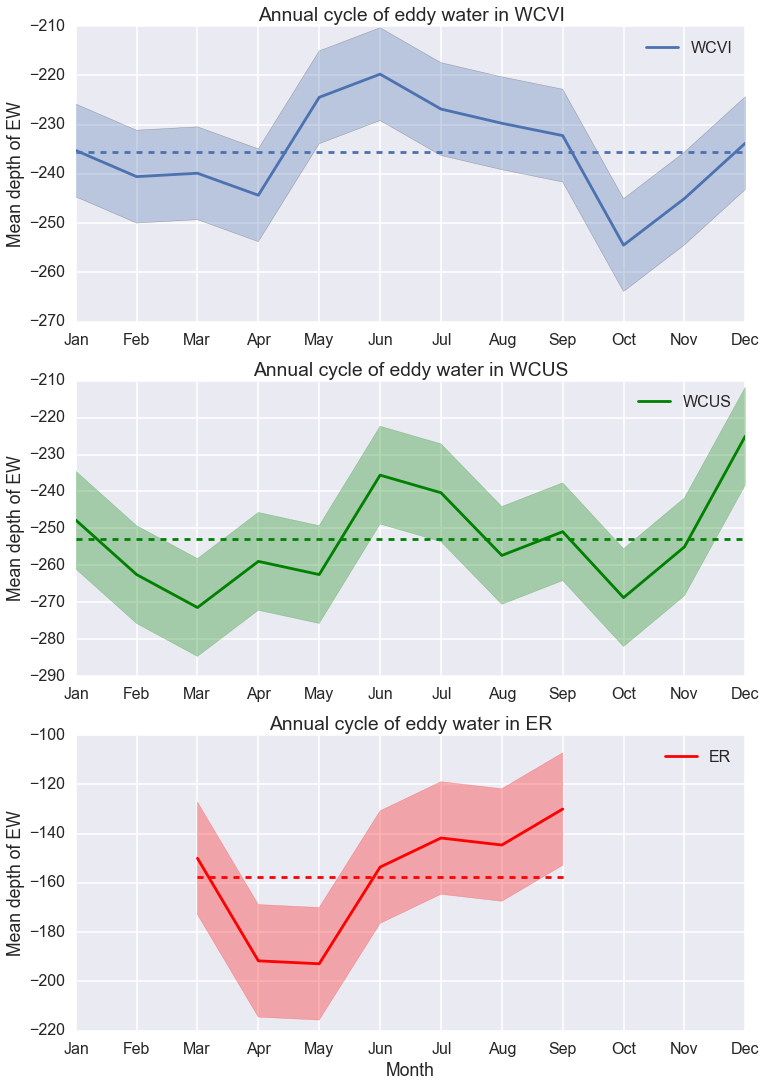

In [21]:
plt.figure(figsize=(12,18))

meanWCVI = np.nanmean([-np.mean(k['dpths']) for k in mnthWCVI_filt])
meanWCUS = np.nanmean([-np.mean(k['dpths']) for k in mnthWCUS_filt])
meanER = np.nanmean([-np.mean(k['dpths']) for k in mnthER_filt])
stdWCVI = np.nanstd([-np.mean(k['dpths']) for k in mnthWCVI_filt])
stdWCUS = np.nanstd([-np.mean(k['dpths']) for k in mnthWCUS_filt])
stdER = np.nanstd([-np.mean(k['dpths']) for k in mnthER_filt])

plt.subplot(3,1,1)
plt.plot(np.arange(1,13), [-np.mean(k['dpths']) for k in mnthWCVI_filt], label='WCVI')
plt.gca().set_color_cycle(None)
plt.fill_between(np.arange(1,13),[-np.mean(k['dpths']) for k in mnthWCVI_filt]-stdWCVI,[-np.mean(k['dpths']) for k in mnthWCVI_filt]+stdWCVI,alpha=0.3)
plt.gca().set_color_cycle(None)
plt.plot(np.arange(1,13), [meanWCVI for k in range(1,13)],'--')
plt.xlim((1,12))
plt.xticks(np.arange(1,13),['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.legend()

plt.ylabel('Mean depth of EW')
plt.title('Annual cycle of eddy water in WCVI')

plt.subplot(3,1,2)
plt.plot(np.arange(1,13), [-np.mean(k['dpths']) for k in mnthWCUS_filt], label='WCUS',color='g')
plt.fill_between(np.arange(1,13),[-np.mean(k['dpths']) for k in mnthWCUS_filt]-stdWCUS,[-np.mean(k['dpths']) for k in mnthWCUS_filt]+stdWCUS,color='g',alpha=0.3)
plt.plot(np.arange(1,13), [meanWCUS for k in range(1,13)],'--g')

plt.xlim((1,12))
plt.xticks(np.arange(1,13),['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.legend()

plt.ylabel('Mean depth of EW')
plt.title('Annual cycle of eddy water in WCUS')

plt.subplot(3,1,3)
plt.plot(np.arange(1,13), [-np.mean(k['dpths']) for k in mnthER_filt], label='ER',color='r')
plt.fill_between(np.arange(1,13),[-np.mean(k['dpths']) for k in mnthER_filt]-stdER,[-np.mean(k['dpths']) for k in mnthER_filt]+stdER,color='r',alpha=0.3)
plt.plot(np.arange(3,10), [meanER for k in range(3,10)],'--r')

plt.xlim((1,12))
plt.xticks(np.arange(1,13),['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.legend()

plt.xlabel('Month')
plt.ylabel('Mean depth of EW')
plt.title('Annual cycle of eddy water in ER')
plt.show()

In the region around Spur canyon, the depths approach 300m going into JdF canyon, but are much shallower around the shelf break, which is approximately 200m. Most of ER defined here occupies shallower water on Allen/La Perouse Banks.

The MB07 water found on the Falkor Cruise was situated between 130m-160m in depth (deepest cast was 160m). This is in agreement with the mean depth of EW in August, as reported here.

Animating Eddy Water
==============

Try and animate the annual eddy water cycle for this data.

In [35]:
def get_histo_dat(cast_inf,lon_bins,lat_bins):
    H2d_all = np.histogram2d(cast_inf['ALL']['lons'],cast_inf['ALL']['lats'],bins=[lon_bins,lat_bins])[0]
    H2d_match = np.histogram2d(cast_inf['EW_TS']['lons'],cast_inf['EW_TS']['lats'],bins=[lon_bins,lat_bins])[0]

    for ii in range(0,H2d_all.shape[0]):
        for jj in range(0,H2d_all.shape[1]):
            if H2d_all[ii,jj] > 0:
                H2d_match[ii,jj] = float(H2d_match[ii,jj])/float(H2d_all[ii,jj])
            else:
                H2d_match[ii,jj] = 0#-1
                
    return H2d_all,H2d_match

NLAT_BINS = 11
NLON_BINS = 11

lon_bins = np.linspace(-130,-122,NLON_BINS+1)
lat_bins = np.linspace(30,56,NLAT_BINS+1)

filt_inf = csvWOD.csvWOD_filter_year(cast_inf,1900,2015)

mnthEW_inf = [{} for k in range(1,13)]
H2d_all = []
H2d_match = []

for ii in range(1,13):
    mnth_cast_inf = csvWOD.csvWOD_filter_month(filt_inf,ii)

    ALL,EW_T,EW_S,EW_TS = get_EW_info(mnth_cast_inf,EPS=0.05)
    mnthEW_inf[ii-1]['ALL'] = copy.copy(ALL)
    mnthEW_inf[ii-1]['EW_TS'] = copy.copy(EW_TS)
    
    H2d_alltmp,H2d_matchtmp = get_histo_dat(mnthEW_inf[ii-1],lon_bins,lat_bins)

    H2d_all.append(H2d_alltmp)
    H2d_match.append(H2d_matchtmp)


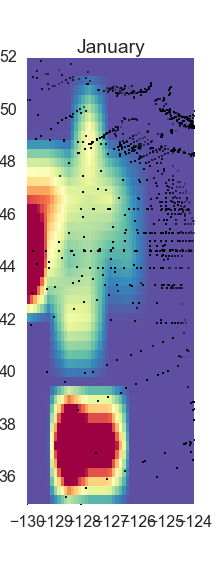
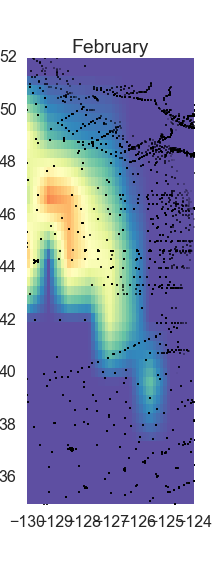
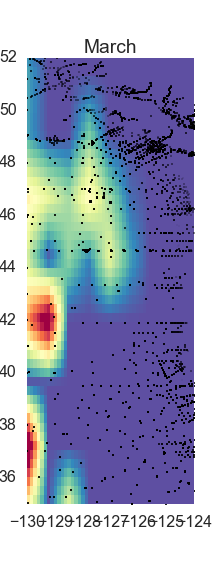
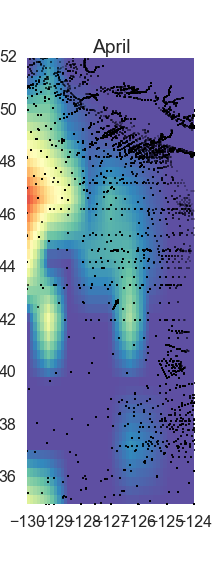
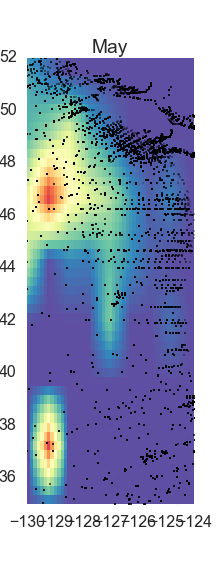
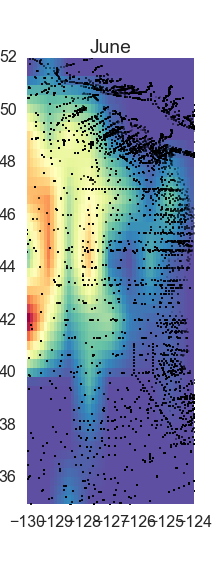
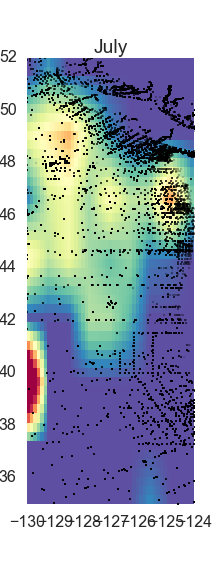
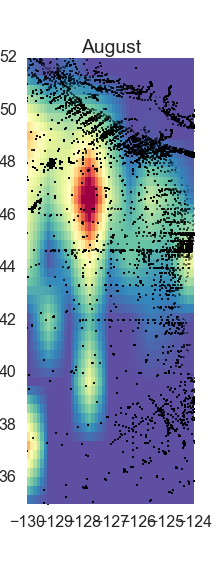
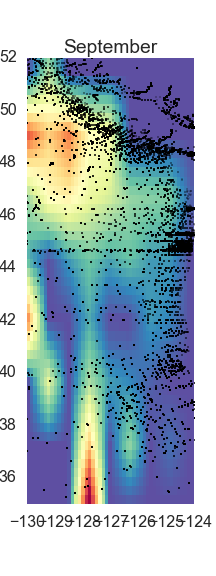
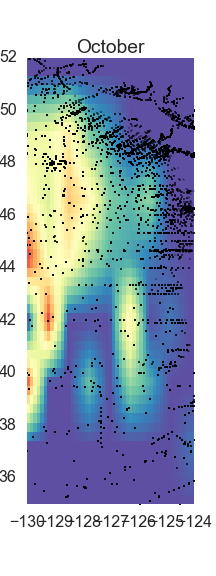
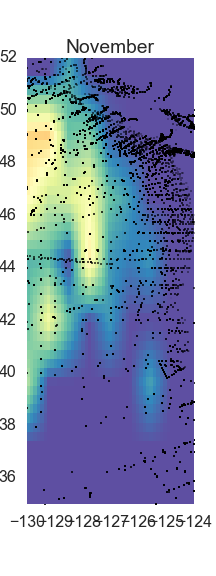
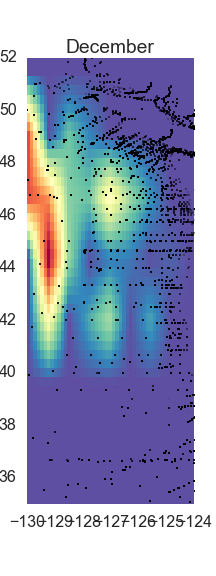

In [36]:
from matplotlib import animation
from JSAnimation import IPython_display

from scipy import interpolate


fig = plt.figure(figsize=(3,8))
ax = plt.axes(xlim=(30,35), ylim=(2,18))
line, = ax.plot([], [], lw=2)

def init():
    line.set_data([], [])
    return line,

def animate(i):
    f = interpolate.interp2d(lon_bins[0:-1], lat_bins[0:-1], H2d_match[i-1].transpose(), kind='linear')
    LON_hr = np.linspace(-130,-124,50)
    LAT_hr = np.linspace(35,52,50)
    H2d_hr = f(LON_hr,LAT_hr)
    
    ax.cla()
    #ax.contour(tDat['lon'],tDat['lat'],tDat['dpth'],levels=[0,-100,-200,-500,-1000],linewidths=1,colors='k')
    #ax.plot(all_filt['ALL']['lons'],all_filt['ALL']['lats'],'.k',ms=2,alpha=0.025)
    ax.plot(mnthEW_inf[i-1]['ALL']['lons'],mnthEW_inf[i-1]['ALL']['lats'],'.k',ms=1,alpha=1)
    #ax.pcolor(lon_bins[0:-1],lat_bins[0:-1],H2d_match[i-1].transpose(),cmap='Spectral_r',vmin=-0.01,vmax=0.01)
    ax.pcolor(LON_hr,LAT_hr,H2d_hr,cmap='Spectral_r',vmin=0,vmax=0.007)
    ax.set_title(calendar.month_name[i+1])
    ax.set_xlim((-130,-124))
    ax.set_ylim((35,52))
    return line,

animation.FuncAnimation(fig, animate, init_func=init,
                        frames=12,interval=500)

In [37]:
import scipy.io as sio

def getTopo():
    topo=sio.loadmat('/ocean/rirwin/2_FALKOR_Data/3_Repo/topo/SouthVIgrid.mat')
    
    tDat = {'lon' : [], 'lat' : [], 'dpth' : []}
    
    tDat['lon'] = np.squeeze(np.array(topo['SouthVIgrid']['lon'][0][0]))
    tDat['lat'] = np.squeeze(np.array(topo['SouthVIgrid']['lat'][0][0]))
    tDat['dpth'] = np.squeeze(np.array(topo['SouthVIgrid']['depth'][0][0]))
    
    return tDat


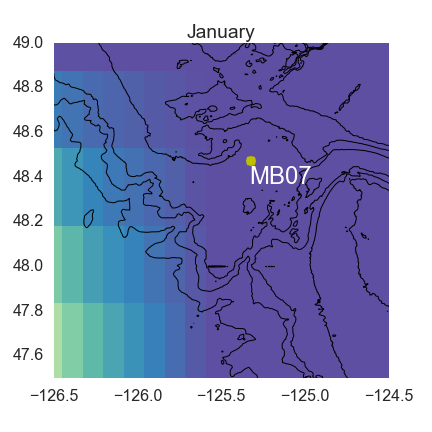
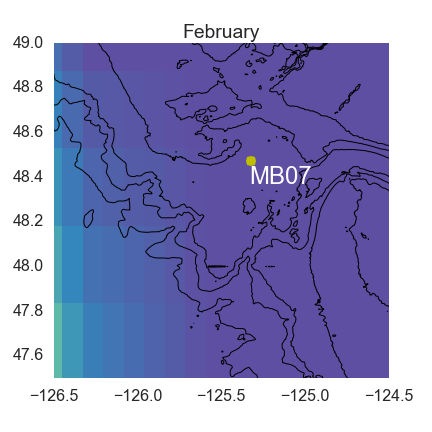
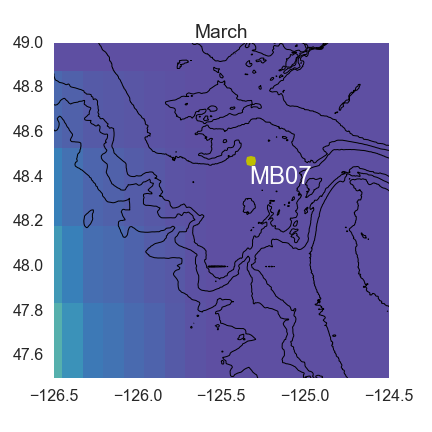
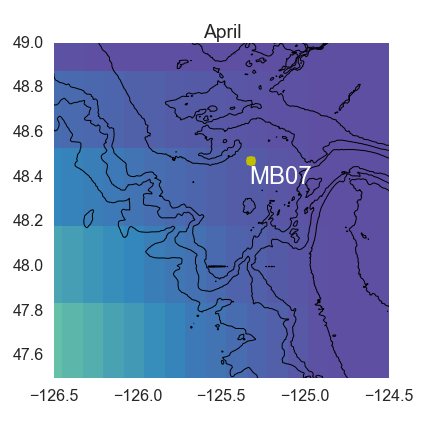
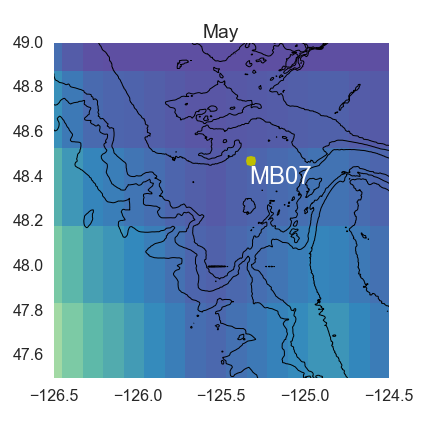
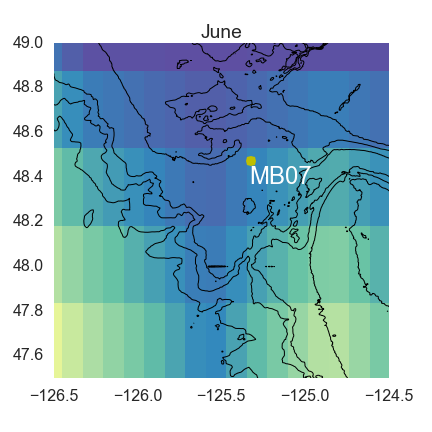
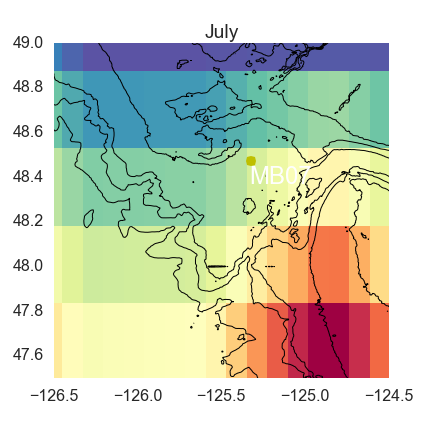
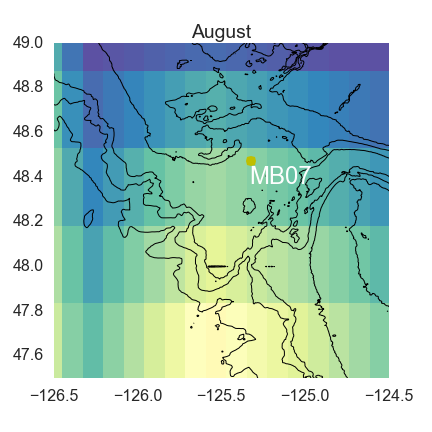
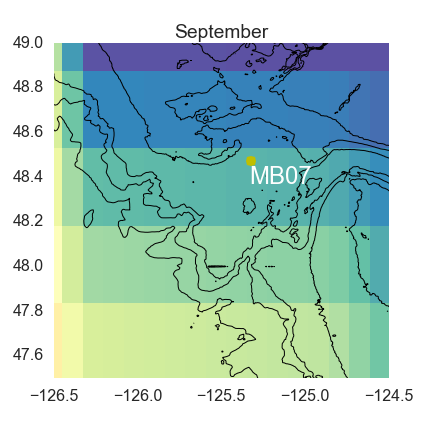
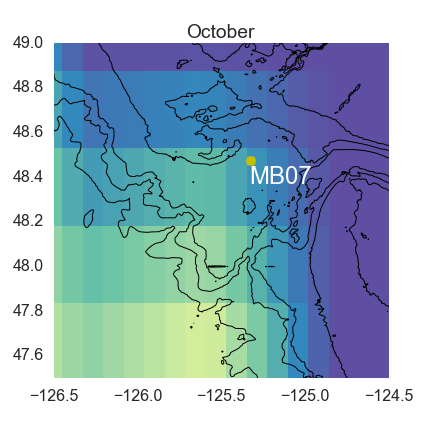
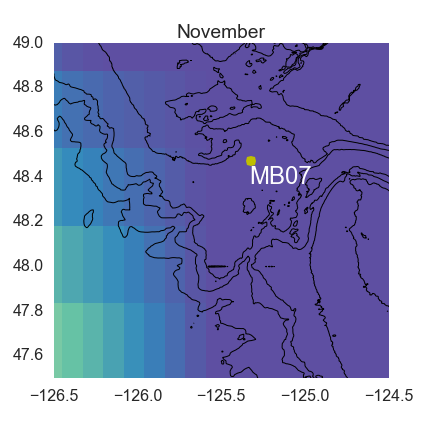
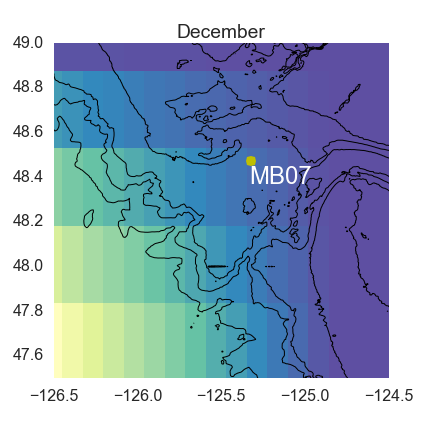

In [38]:
from matplotlib import animation
from JSAnimation import IPython_display

from scipy import interpolate

tDat = getTopo()

fig = plt.figure(figsize=(6,6))
ax = plt.axes(xlim=(30,35), ylim=(2,18))
line, = ax.plot([], [], lw=2)

def init():
    line.set_data([], [])
    return line,

def animate(i):
    f = interpolate.interp2d(lon_bins[0:-1], lat_bins[0:-1], H2d_match[i-1].transpose(), kind='linear')
    LON_hr = np.linspace(-130,-124,50)
    LAT_hr = np.linspace(35,52,50)
    H2d_hr = f(LON_hr,LAT_hr)
    
    ax.cla()
    ax.contour(tDat['lon'],tDat['lat'],tDat['dpth'],levels=[0,-100,-200,-500,-1000],linewidths=1,colors='k',linestyles='-')
    ax.plot(all_filt['ALL']['lons'],all_filt['ALL']['lats'],'.k',ms=2,alpha=0.0025)
    ax.plot(MB07[0],MB07[1]+0.1,'oy',ms=10)
    ax.annotate(s='MB07',xy=(MB07[0],MB07[1]),fontsize=24,color='w')
    #ax.pcolor(lon_bins[0:-1],lat_bins[0:-1],H2d_match[i-1].transpose(),cmap='Spectral_r',vmin=-0.01,vmax=0.01)
    ax.pcolor(LON_hr,LAT_hr,H2d_hr,cmap='Spectral_r',vmin=0,vmax=0.003)
    ax.set_title(calendar.month_name[i+1])
    ax.set_xlim((-126.5,-124.5))
    ax.set_ylim((47.5,49))
    return line,

animation.FuncAnimation(fig, animate, init_func=init,
                        frames=12,interval=500)

The eddy water doesn't appear around MB07 until May. This is a two month delay when compared to the approximate current switch, and suggested upwelling start. Of course, the annual cycle bar chart shows evidence of EW in March, so this is inconsistent. Additionally, the eddy water remains in the region until October, but this is inconsistent with the annual cycle bar chart above, so it is clearly interpolation error.

Interpreting this very coarse approximation to EW dynamics, it appears that offshore water comes onto the shelf south of the eddy region, and is advected north, possibly by the CUC; although the water does not originate from the CUC.

This animation is interpolated from a $12\times 12$ grid onto a $50 \times 50$ grid for viewability. There is a significant sparsity of casts in Jan and Dec in the southernmost regions of the domain.

Long Term Trends
==========

What can we say about the climatology of EW in the region? Knowing that the Mackas values for the CUC have changed between 1987-present, it can likely be assumed that the properties of the JdF eddy have changed as well. However, we can try and investigate how prevalent the presence of EW is.

In [26]:
MIN_YEAR = 1960
MAX_YEAR = 2009 # 2009 is the most recent year with available data, need to get updated WOD set

yrER_filt = [[] for k in range(MIN_YEAR,MAX_YEAR+1)]
yrWCVI_filt = [[] for k in range(MIN_YEAR,MAX_YEAR+1)]
yrWCUS_filt = [[] for k in range(MIN_YEAR,MAX_YEAR+1)]

# look at monthly values/percentages/stats for each month
for jj,ii in enumerate(range(MIN_YEAR,MAX_YEAR+1)):
    ALL,EW_T,EW_S,EW_TS = get_EW_info(csvWOD.csvWOD_filter_year(ER_cinf,ii),EPS=0.05)
    yrER_filt[jj] = copy.copy(EW_TS)
    yrER_filt[jj]['count'] = len(ALL['lats'])
    if len(ALL['lats']) > 0:
        yrER_filt[jj]['match_perc'] = float(len(EW_TS['lats']))/float(len(ALL['lats']))
    else:
        yrER_filt[jj]['match_perc'] = 0.0
    
    ALL,EW_T,EW_S,EW_TS = get_EW_info(csvWOD.csvWOD_filter_year(WCVI_cinf,ii),EPS=0.05)
    yrWCVI_filt[jj] = copy.copy(EW_TS)
    yrWCVI_filt[jj]['count'] = len(ALL['lats'])
    if len(ALL['lats']) > 0:
        yrWCVI_filt[jj]['match_perc'] = float(len(EW_TS['lats']))/float(len(ALL['lats']))
    else:
        yrWCVI_filt[jj]['match_perc'] = 0.0

    ALL,EW_T,EW_S,EW_TS = get_EW_info(csvWOD.csvWOD_filter_year(WCUS_cinf,ii),EPS=0.05)
    yrWCUS_filt[jj] = copy.copy(EW_TS)
    yrWCUS_filt[jj]['count'] = len(ALL['lats'])
    if len(ALL['lats']) > 0:
        yrWCUS_filt[jj]['match_perc'] = float(len(EW_TS['lats']))/float(len(ALL['lats']))
    else:
        yrWCUS_filt[jj]['match_perc'] = 0.0

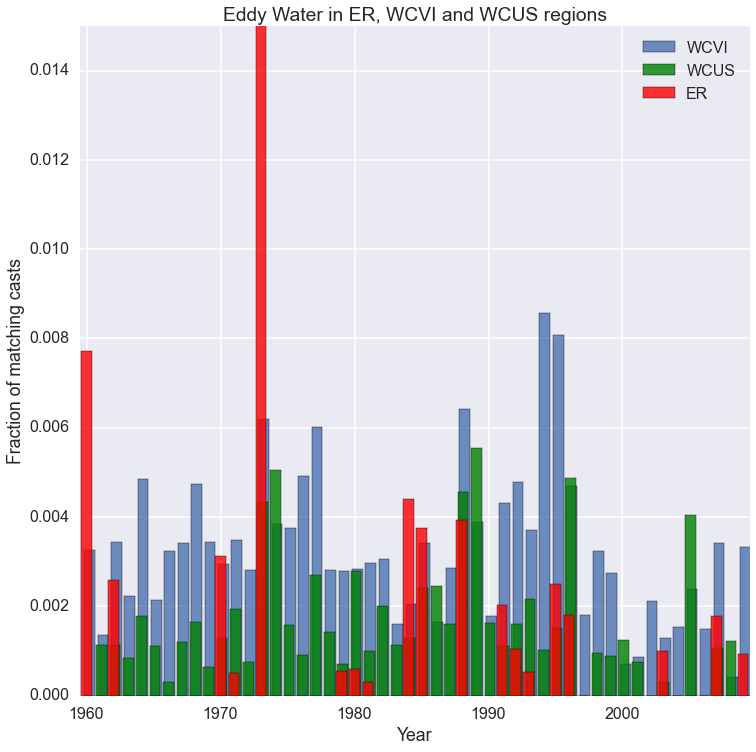

Correlation coefficients for mean EW freq
Corr(WCUS,WCVI) :  0.365655418216
Corr(ER,  WCVI) :  0.310445085481
Corr(ER,  WCUS) :  0.267741439733

Correlation between available casts and EW frequency:
-0.0165431087052


In [27]:
plt.figure(figsize=(12,12))

WCVI_freq = [k['match_perc'] for k in yrWCVI_filt] 
WCUS_freq = [k['match_perc'] for k in yrWCUS_filt]
ER_freq = [k['match_perc'] for k in yrER_filt]

plt.bar(np.arange(MIN_YEAR,MAX_YEAR+1)-0.2, WCVI_freq, label='WCVI',alpha=0.8)
plt.bar(np.arange(MIN_YEAR,MAX_YEAR+1)-0.3, WCUS_freq, label='WCUS',color='g',alpha=0.8)
plt.bar(np.arange(MIN_YEAR,MAX_YEAR+1)-0.4, ER_freq, label='ER',alpha=0.8,color='r')

plt.xlim((MIN_YEAR-0.5,MAX_YEAR+0.5))
plt.ylim((0,.015))
plt.legend()
plt.xlabel('Year')
plt.ylabel('Fraction of matching casts')
plt.title('Eddy Water in ER, WCVI and WCUS regions')


#ax = plt.twinx()
#ax.semilogy(np.arange(MIN_YEAR,MAX_YEAR+1),[k['count'] for k in yrER_filt],'ok',lw=5)

plt.show()

yrER_casts_avail = [k['count'] for k in yrER_filt]

# ## ALSO LOOK AT THE CORRELATION BETWEEN CURVES
print "Correlation coefficients for mean EW freq"
print "==========================================="
print "Corr(WCUS,WCVI) : ", np.corrcoef(WCUS_freq,WCVI_freq)[1,0]
print "Corr(ER,  WCVI) : ", np.corrcoef(ER_freq,WCVI_freq)[1,0]
print "Corr(ER,  WCUS) : ", np.corrcoef(ER_freq,WCUS_freq)[1,0]
print ""
print "Correlation between available casts and EW frequency:"
print np.corrcoef(yrER_casts_avail,ER_freq)[1,0]

The correlation between all values here seems insignificant. Notably, there is no correlation between available casts and EW frequency -- this implies that the years where there is "no eddy water" (red bars vanish), it's not from lack of data, but a real phenomena. This is not terribly surprising, as the values of "eddy water" probably change from year to year. Perhaps it is worth looking at casts around 170m +/- 20m depth in the ER for Jun-Aug of each year to try and get a better idea of how the eddy water values are changing from year-to-year. [maybe a better idea to call it zero-spice water instead of eddy water?]

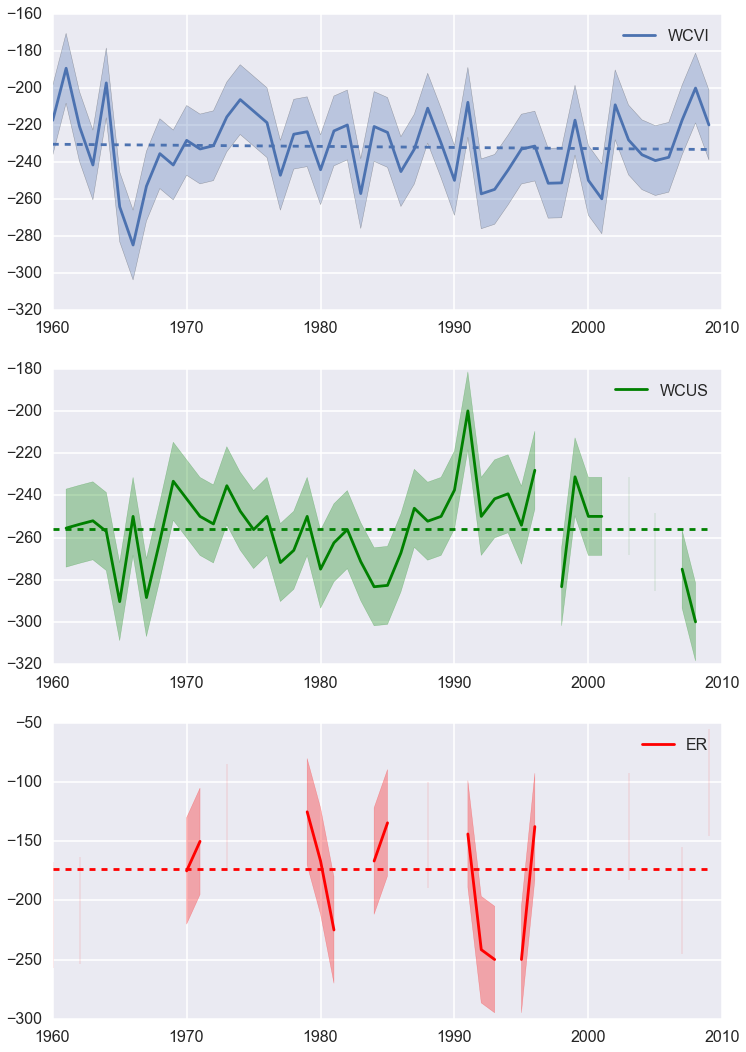

In [28]:
plt.figure(figsize=(12,18))

yrmeanWCVI = np.nanmean([-np.mean(k['dpths']) for k in yrWCVI_filt])
yrmeanWCUS = np.nanmean([-np.mean(k['dpths']) for k in yrWCUS_filt])
yrmeanER = np.nanmean([-np.mean(k['dpths']) for k in yrER_filt])
yrstdWCVI = np.nanstd([-np.mean(k['dpths']) for k in yrWCVI_filt])
yrstdWCUS = np.nanstd([-np.mean(k['dpths']) for k in yrWCUS_filt])
yrstdER = np.nanstd([-np.mean(k['dpths']) for k in yrER_filt])

plt.subplot(3,1,1)
plt.plot(np.arange(MIN_YEAR,MAX_YEAR+1), [-np.mean(k['dpths']) for k in yrWCVI_filt], label='WCVI')
plt.gca().set_color_cycle(None)
plt.fill_between(np.arange(MIN_YEAR,MAX_YEAR+1),[-np.mean(k['dpths']) for k in yrWCVI_filt]-yrstdWCVI,[-np.mean(k['dpths']) for k in yrWCVI_filt]+yrstdWCVI,alpha=0.3)
plt.gca().set_color_cycle(None)

xx = np.arange(MIN_YEAR,MAX_YEAR+1)
yy = np.array([-np.mean(k['dpths']) for k in yrWCVI_filt])
idx = np.isfinite(xx) & np.isfinite(yy)
p = np.polyfit(xx[idx], yy[idx],1)
plt.plot(xx,p[0]*xx+p[1],'--')
#plt.plot(np.arange(MIN_YEAR,MAX_YEAR+1), [yrmeanWCVI for k in np.arange(MIN_YEAR,MAX_YEAR+1)],'--')


plt.legend()

plt.subplot(3,1,2)
plt.plot(np.arange(MIN_YEAR,MAX_YEAR+1), [-np.mean(k['dpths']) for k in yrWCUS_filt], label='WCUS',color='g')
plt.fill_between(np.arange(MIN_YEAR,MAX_YEAR+1),[-np.mean(k['dpths']) for k in yrWCUS_filt]-yrstdWCUS,[-np.mean(k['dpths']) for k in yrWCUS_filt]+yrstdWCUS,color='g',alpha=0.3)
plt.plot(np.arange(MIN_YEAR,MAX_YEAR+1), [yrmeanWCUS for k in np.arange(MIN_YEAR,MAX_YEAR+1)],'--g')
plt.legend()

plt.subplot(3,1,3)
plt.plot(np.arange(MIN_YEAR,MAX_YEAR+1), [-np.mean(k['dpths']) for k in yrER_filt], label='ER',color='r')
plt.fill_between(np.arange(MIN_YEAR,MAX_YEAR+1),[-np.mean(k['dpths']) for k in yrER_filt]-yrstdER,[-np.mean(k['dpths']) for k in yrER_filt]+yrstdER,color='r',alpha=0.3)
plt.plot(np.arange(MIN_YEAR,MAX_YEAR+1), [yrmeanER for k in np.arange(MIN_YEAR,MAX_YEAR+1)],'--r')
plt.legend()
plt.show()